## 📊 Dataset Distribution
We’ll plot:
1. Per-label frequency bar chart  
2. Histogram of how many emotions each sample has  
3. Top 5 most common multi-label combinations  


### 1) Load & prepare data

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("track-a.csv")
EMOTION_COLS = ['anger','fear','joy','sadness','surprise']
df[EMOTION_COLS] = (
    df[EMOTION_COLS]
    .apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
)
df = df[df[EMOTION_COLS].sum(axis=1) > 0].reset_index(drop=True)


### 2) Bar chart of each emotion

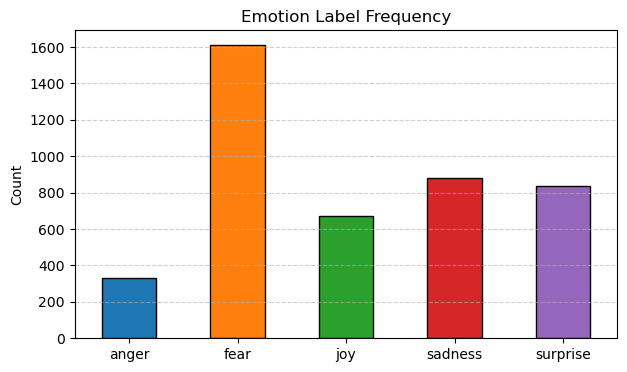

In [90]:
import matplotlib.pyplot as plt

# 1) Compute
label_counts = df[EMOTION_COLS].sum()

# 2) Select distinct colors
colors = plt.cm.tab10.colors[: len(label_counts)]  
#    ↑ tab10 has 10 distinct colors; we only need as many as emotions

# 3) Plot with colors
plt.figure(figsize=(7,4))
label_counts.plot(
    kind='bar',
    color=colors,        # pass the list of colors here
    edgecolor='black'    # add black edges for clarity
)
plt.title("Emotion Label Frequency")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Below is a table showing the total count of each emotion label in the cleaned dataset

In [80]:
EMOTION_COLS = ['anger','fear','joy','sadness','surprise']

counts = (
    df[EMOTION_COLS]
      .sum()
      .reset_index()
      .rename(columns={'index':'Emotion', 0:'Count'})
      .sort_values(by='Count', ascending=False)
)



display(counts)

,Emotion,Count
1,fear,1611
3,sadness,878
4,surprise,839
2,joy,674
0,anger,333


### 3) Histogram: number of emotions per sample

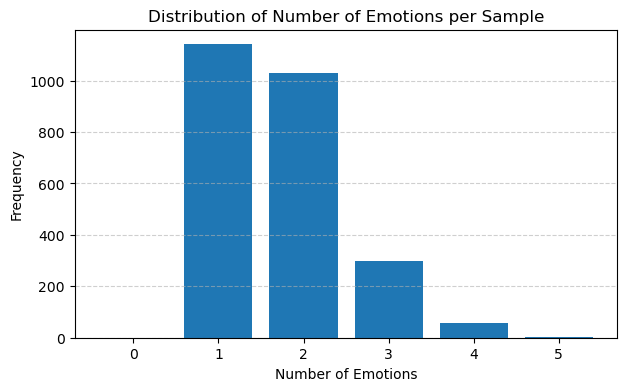

In [61]:
label_sum = df[EMOTION_COLS].sum(axis=1)
plt.figure(figsize=(7,4))
plt.hist(label_sum, bins=range(label_sum.max()+2), align='left', rwidth=0.8)
plt.title("Distribution of Number of Emotions per Sample")
plt.xlabel("Number of Emotions")
plt.ylabel("Frequency")
plt.xticks(range(label_sum.max()+1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Top 5 Multi-Label Combinations
4) Compute and display the top 5 most frequent label combinations

In [88]:

combo_counts = (
    df[EMOTION_COLS]
    .apply(lambda row: tuple(sorted([emo for emo, flag in zip(EMOTION_COLS, row) if flag])), axis=1)
    .value_counts()
)
top5 = combo_counts.head(5).reset_index()
top5.columns = ["Emotion Combination", "Count"]
display(top5)


,Emotion Combination,Count
0,"(joy,)",429
1,"(fear, sadness)",412
2,"(fear,)",411
3,"(fear, surprise)",324
4,"(sadness,)",133


In [86]:
# Keep only combinations of length >= 2
multi_combo_counts = combo_counts[
    combo_counts.index.map(len) > 1
]

# Show top 5 multi-emotion combos
multi_combo_counts.head(5)


(fear, sadness)              412
(fear, surprise)             324
(fear, sadness, surprise)    124
(joy, surprise)              108
(anger, fear, sadness)        77
Name: count, dtype: int64